In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
date = "08-09-24"
data_location = rf"E:\Project 6 - Temperature\Experiments\data_analysis\{date}"
full_periods = pd.read_csv(data_location + f"/{date}_full_periods.csv")
partial_periods = pd.read_csv(data_location + f"/{date}_partial_periods.csv")

# Full period - First and second cycles

In [3]:
control = full_periods[
    (full_periods["POSITION"] <= 13) &
    (full_periods["PEAK_TO_PEAK_CYCLE_NUMBER"] == 2)
]
treatment = full_periods[
    (full_periods["POSITION"] >= 14) &
    (full_periods["PEAK_TO_PEAK_CYCLE_NUMBER"] == 2)
]

In [4]:
control_temperature = control["MEAN_TEMPERATURE"]
control_periods = control["PEAK_TO_PEAK_PERIOD"]
treatment_temperature = treatment["MEAN_TEMPERATURE"]
treatment_periods = treatment["PEAK_TO_PEAK_PERIOD"]

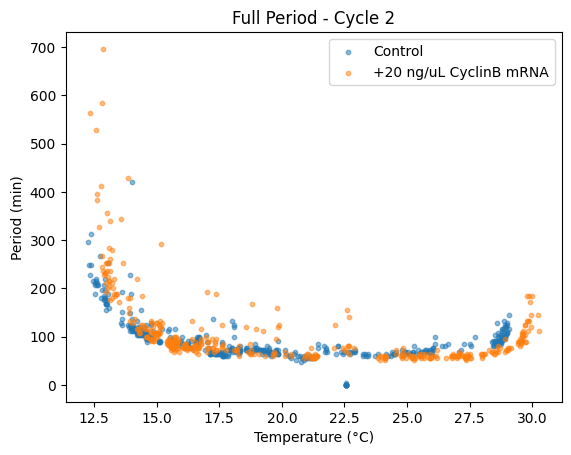

In [56]:
fig, ax = plt.subplots()
ax.title.set_text("Full Period - Cycle 2")
ax.scatter(control_temperature, control_periods, label="Control",
           color="tab:blue", alpha=0.5, s=10)
ax.scatter(treatment_temperature, treatment_periods, label="+20 ng/uL CyclinB mRNA",
           color="tab:orange", alpha=0.5, s=10)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Period (min)")
ax.legend()
plt.show()

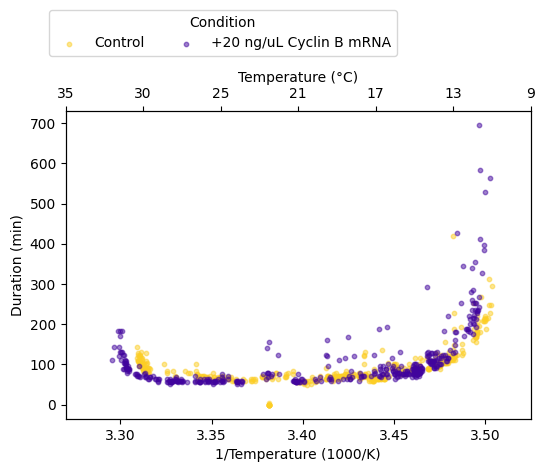

In [9]:
# For thesis
save_path = "E:/Thesis/Chapter 4 - Temperature/"
K0 = 273.15
cmap = plt.get_cmap("plasma")
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(1000 / (control_temperature + K0) , control_periods, label="Control",
           color=cmap(0.9), alpha=0.5, s=10)
ax.scatter(1000 / (treatment_temperature + K0), treatment_periods, label="+20 ng/uL Cyclin B mRNA",
           color=cmap(0.1), alpha=0.5, s=10)
ax.set_xlabel("1/Temperature (1000/K)")
ax.set_ylabel("Duration (min)")

ax.set_xlim([3.27, 3.525])
ax2 = ax.twiny()
xticks = ax.get_xticks()
new_labels = [f"{1000/t - K0:.0f}" for t in xticks]
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(xticks)
ax2.set_xticklabels(new_labels)
ax2.set_xlabel("Temperature (°C)")

ax.legend(title="Condition", 
          bbox_to_anchor=(-0.05, 1.35), loc='upper left', ncols=3)
save_fig_path = save_path + "08_09_24_mRNA_added_data.pdf"
plt.savefig(save_fig_path)
plt.show()

In [57]:
# Find baseline with periods between 20 and 22 temperature
control_baseline = control[
    (control["MEAN_TEMPERATURE"] >= 20) &
    (control["MEAN_TEMPERATURE"] <= 22)
]
control_baseline_period = control_baseline["PEAK_TO_PEAK_PERIOD"].mean()

treatment_baseline = treatment[
    (treatment["MEAN_TEMPERATURE"] >= 20) &
    (treatment["MEAN_TEMPERATURE"] <= 22)
]
treatment_baseline_period = treatment_baseline["PEAK_TO_PEAK_PERIOD"].mean()

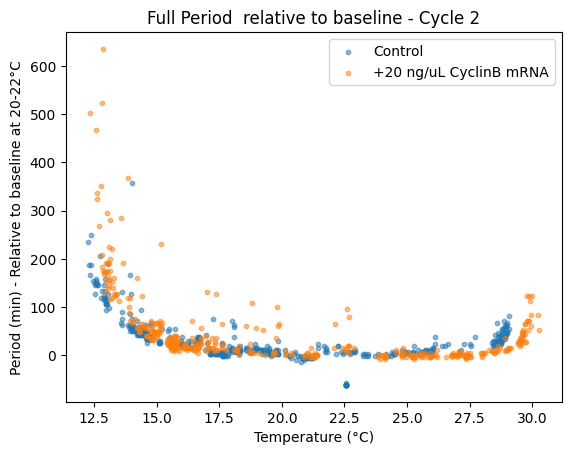

In [58]:
fig, ax = plt.subplots()
ax.title.set_text("Full Period  relative to baseline - Cycle 2")
ax.scatter(control_temperature, control_periods - control_baseline_period, label="Control",
           color="tab:blue", alpha=0.5, s=10)
ax.scatter(treatment_temperature, treatment_periods - treatment_baseline_period, label="+20 ng/uL CyclinB mRNA",
           color="tab:orange", alpha=0.5, s=10)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Period (min) - Relative to baseline at 20-22°C")
ax.legend()
plt.show()

# Rising period - First and second cycles

In [59]:
control = partial_periods[
    (partial_periods["POSITION"] <= 13) &
    (partial_periods["TROUGH_TO_PEAK_CYCLE_NUMBER"] == 2)
]
treatment = partial_periods[
    (partial_periods["POSITION"] >= 14) &
    (partial_periods["TROUGH_TO_PEAK_CYCLE_NUMBER"] == 2)
]

In [60]:
control_temperature = control["MEAN_TEMPERATURE"]
control_periods = control["TROUGH_TO_PEAK_PERIOD"]
treatment_temperature = treatment["MEAN_TEMPERATURE"]
treatment_periods = treatment["TROUGH_TO_PEAK_PERIOD"]

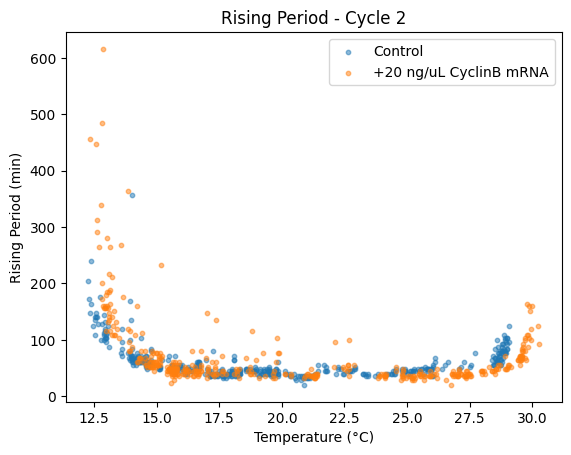

In [61]:
fig, ax = plt.subplots()
ax.title.set_text("Rising Period - Cycle 2")
ax.scatter(control_temperature, control_periods, label="Control",
           color="tab:blue", alpha=0.5, s=10)
ax.scatter(treatment_temperature, treatment_periods, label="+20 ng/uL CyclinB mRNA",
           color="tab:orange", alpha=0.5, s=10)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Rising Period (min)")
ax.legend()
plt.show()

# Falling period - First and second cycles

In [62]:
control = partial_periods[
    (partial_periods["POSITION"] <= 13) &
    (partial_periods["PEAK_TO_TROUGH_CYCLE_NUMBER"] == 2)
]
treatment = partial_periods[
    (partial_periods["POSITION"] >= 14) &
    (partial_periods["PEAK_TO_TROUGH_CYCLE_NUMBER"] == 2)
]

In [63]:
control_temperature = control["MEAN_TEMPERATURE"]
control_periods = control["PEAK_TO_TROUGH_PERIOD"]
treatment_temperature = treatment["MEAN_TEMPERATURE"]
treatment_periods = treatment["PEAK_TO_TROUGH_PERIOD"]

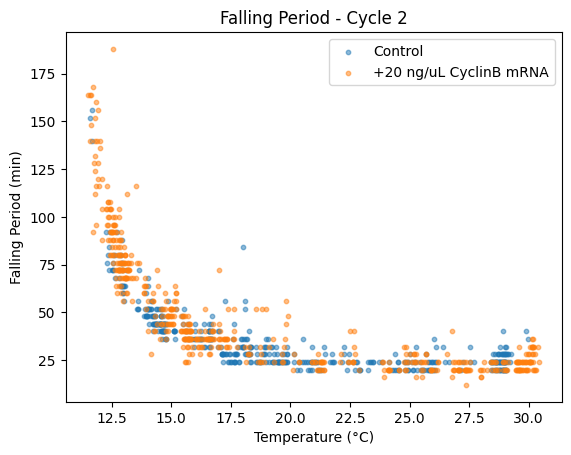

In [64]:
fig, ax = plt.subplots()
ax.title.set_text("Falling Period - Cycle 2")
ax.scatter(control_temperature, control_periods, label="Control",
           color="tab:blue", alpha=0.5, s=10)
ax.scatter(treatment_temperature, treatment_periods, label="+20 ng/uL CyclinB mRNA",
           color="tab:orange", alpha=0.5, s=10)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Falling Period (min)")
ax.legend()
plt.show()

# Plot peaks

In [69]:
all_data = pd.read_csv(data_location + rf"\{date}_all_features_combined_renumbered.csv")

In [73]:
control = all_data[
    (all_data["POSITION"] <= 13) &
    (all_data["CYCLE"] <= 3) &
    (all_data["TYPE"] == "PEAK")
]
treatment = all_data[
    (all_data["POSITION"] >= 14) &
    (all_data["CYCLE"] <= 3) &
    (all_data["TYPE"] == "PEAK")
]

In [74]:
control_temperature = control["MEAN_TEMPERATURE"]
control_peak_times = control["TIME"]
treatment_temperature = treatment["MEAN_TEMPERATURE"]
treatment_peak_times = treatment["TIME"]

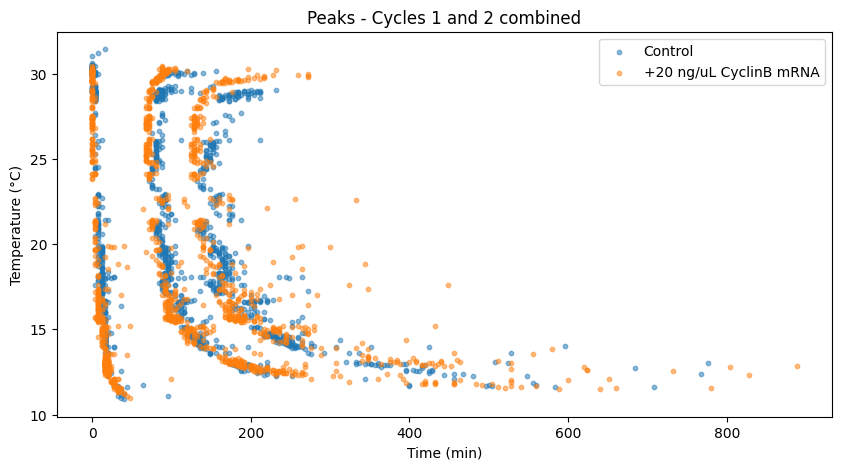

In [75]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.title.set_text("Peaks - First 3 cycles")
ax.scatter(control_peak_times, control_temperature, label="Control",
           color="tab:blue", alpha=0.5, s=10)
ax.scatter(treatment_peak_times, treatment_temperature, label="+20 ng/uL CyclinB mRNA",
              color="tab:orange", alpha=0.5, s=10)
ax.set_xlabel("Time (min)")
ax.set_ylabel("Temperature (°C)")
ax.legend()
plt.show()